In [292]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

data1 = pd.read_csv("corona.csv",encoding = "cp1252")


In [293]:
data_india = data1[data1["Country"]=="India"]

print(index1)


[50355]


In [294]:
data_india.dtypes

Date_reported        object
Country_code         object
Country              object
WHO_region           object
New_cases             int64
Cumulative_cases      int64
New_deaths            int64
Cumulative_deaths     int64
dtype: object

In [295]:
data_india

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
49920,1/3/2020,IN,India,SEARO,0,0,0,0
49921,1/4/2020,IN,India,SEARO,0,0,0,0
49922,1/5/2020,IN,India,SEARO,0,0,0,0
49923,1/6/2020,IN,India,SEARO,0,0,0,0
49924,1/7/2020,IN,India,SEARO,0,0,0,0
...,...,...,...,...,...,...,...,...
50435,6/1/2021,IN,India,SEARO,127510,28175044,2795,331895
50436,6/2/2021,IN,India,SEARO,132788,28307832,3207,335102
50437,6/3/2021,IN,India,SEARO,134154,28441986,2887,337989
50438,6/4/2021,IN,India,SEARO,132364,28574350,2713,340702


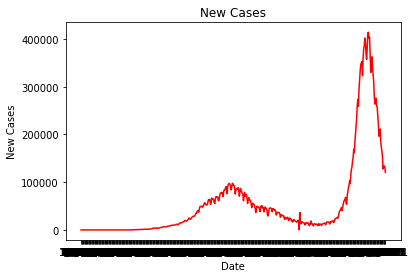

In [296]:
Ndate = data_india["Date_reported"]
New_cases = data_india["New_cases"]
New_deaths = data_india["New_deaths"]


# New Cases
plt.plot(Ndate, New_cases, color ='r', label = "New Cases")
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.title("New Cases")

plt.show()


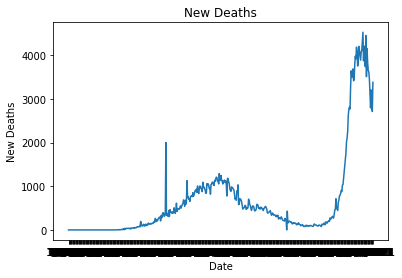

In [297]:
# New Deaths 

plt.plot(Ndate,New_deaths,label = "New Deaths")
plt.xlabel("Date")
plt.ylabel("New Deaths")
plt.title("New Deaths")

plt.show()


In [298]:
corrMatrix = data_india.corr()
print (corrMatrix)

#Correlation between New Cases and Deaths  = 0.91 Which means New cases and Deaths are proportional to each other. 


                   New_cases  Cumulative_cases  New_deaths  Cumulative_deaths
New_cases           1.000000          0.712569    0.912011           0.639002
Cumulative_cases    0.712569          1.000000    0.739232           0.987448
New_deaths          0.912011          0.739232    1.000000           0.662914
Cumulative_deaths   0.639002          0.987448    0.662914           1.000000


In [299]:
# Calculating the number of deaths with relation to New Cases 
X = data_india[['New_cases']]
y = data_india[['New_deaths']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)


In [300]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [301]:
# Predicting the Test set results (y = mx +c)
y_pred = regressor.predict(X_test)
print("Value of coefficients (x) : ",regressor.coef_[0][0])
print("Value of Intercept(c) : ",regressor.intercept_[0])

Value of coefficients (x) :  0.010377284557988307
Value of Intercept(c) :  98.50091441924906


In [302]:
# Score  (r square -  Accuracy)- 
print("Accuracy Score By Linear Regression : ",regressor.score(X, y) * 100, "%")

Accuracy Score By Linear Regression :  83.16718373092525 %


In [303]:
y_pred_new = regressor.predict(X)


520
520


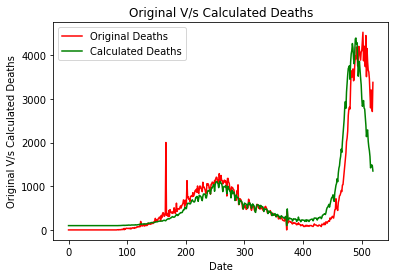

In [304]:
date_mat = []
for i in range(len(y)):
    date_mat.append(i)
    
Ndate = date_mat
Org_Deaths = y
New_deaths = y_pred_new


# New Cases
plt.plot(Ndate, Org_Deaths, color='r',label= "Original Deaths")
plt.plot(Ndate, New_deaths, color='g', label='Calculated Deaths')
  
# Naming the x-axis, y-axis and the whole graph
plt.ylabel("Original V/s Calculated Deaths")
plt.xlabel("Date")
plt.title("Original V/s Calculated Deaths")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()


In [305]:
###########################################################################################################################

In [306]:
# NIFTY DATA 

nifty_data = pd.read_csv("nifty.csv",encoding = "cp1252")
nifty_data


,Date,Open,High,Low,Close,Adj Close,Volume
0,3/1/2019,10842.65039,10877.90039,10823.09961,10863.50000,10863.50000,308500.0
1,3/5/2019,10864.84961,10994.90039,10817.00000,10987.45020,10987.45020,373200.0
2,3/6/2019,11024.84961,11062.29981,10998.84961,11053.00000,11053.00000,372600.0
3,3/7/2019,11077.95020,11089.04981,11027.09961,11058.20020,11058.20020,321200.0
4,3/8/2019,11038.84961,11049.00000,11008.95020,11035.40039,11035.40039,326600.0
...,...,...,...,...,...,...,...
546,5/24/2021,15211.34961,15256.25000,15145.45020,15197.70020,15197.70020,579800.0
547,5/25/2021,15291.75000,15293.84961,15163.40039,15208.45020,15208.45020,441500.0
548,5/26/2021,15257.04981,15319.90039,15194.95020,15301.45020,15301.45020,384000.0
549,5/27/2021,15323.95020,15384.54981,15272.50000,15337.84961,15337.84961,0.0


In [307]:
nifty_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,3/1/2019,10842.65039,10877.90039,10823.09961,10863.50000,10863.50000,308500.0
1,3/5/2019,10864.84961,10994.90039,10817.00000,10987.45020,10987.45020,373200.0
2,3/6/2019,11024.84961,11062.29981,10998.84961,11053.00000,11053.00000,372600.0
3,3/7/2019,11077.95020,11089.04981,11027.09961,11058.20020,11058.20020,321200.0
4,3/8/2019,11038.84961,11049.00000,11008.95020,11035.40039,11035.40039,326600.0
...,...,...,...,...,...,...,...
546,5/24/2021,15211.34961,15256.25000,15145.45020,15197.70020,15197.70020,579800.0
547,5/25/2021,15291.75000,15293.84961,15163.40039,15208.45020,15208.45020,441500.0
548,5/26/2021,15257.04981,15319.90039,15194.95020,15301.45020,15301.45020,384000.0
549,5/27/2021,15323.95020,15384.54981,15272.50000,15337.84961,15337.84961,0.0


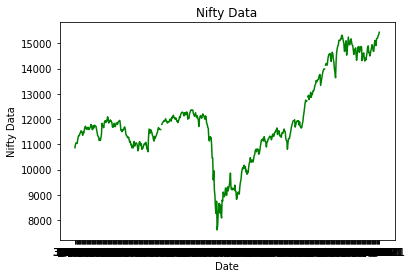

In [308]:
Nifty_date = nifty_data["Date"]
Closing = nifty_data["Close"]


# New Cases
plt.plot(Nifty_date, Closing, color = 'green', label = "Nifty Data")
plt.xlabel("Date")
plt.ylabel("Nifty Data")
plt.title("Nifty Data")


plt.show()


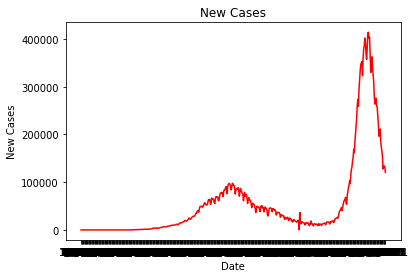

In [309]:
Ndate = data_india["Date_reported"]
New_cases = data_india["New_cases"]
New_deaths = data_india["New_deaths"]


# New Cases
plt.plot(Ndate, New_cases, color = 'r', label = "New Cases")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.title("New Cases")

plt.show()


In [310]:
# Concatinating Nifty and Corona Data 
nifty_price = []
cases = []
deaths = []
date_n = []
for j in range(len(nifty_data)):
    for i in range(len(data_india)):
        if (data_india["Date_reported"].values[i] == nifty_data["Date"].values[j]):
            date_n.append(data_india["Date_reported"].values[i])
            cases.append(data_india["New_cases"].values[i])
            deaths.append(data_india["New_deaths"].values[i])




In [311]:
for i in range(len(nifty_data)):
    if nifty_data["Date"].values[i]  in date_n:
        nifty_price.append(nifty_data["Close"].values[i])

In [312]:
final_data = pd.DataFrame(list(zip(date_n,cases,deaths,nifty_price )),columns =['date_n','cases','deaths','nifty_price'])

In [313]:
final_data

,date_n,cases,deaths,nifty_price
0,1/3/2020,0,0,12226.65039
1,1/6/2020,0,0,11993.04981
2,1/7/2020,0,0,12052.95020
3,1/8/2020,0,0,12025.34961
4,1/9/2020,0,0,12215.90039
...,...,...,...,...
343,5/24/2021,222315,4454,15197.70020
344,5/25/2021,196427,3511,15208.45020
345,5/26/2021,208921,4157,15301.45020
346,5/27/2021,211298,3847,15337.84961


In [314]:
corrMatrix = final_data.corr()
print (corrMatrix)


                cases    deaths  nifty_price
cases        1.000000  0.920187     0.427422
deaths       0.920187  1.000000     0.353291
nifty_price  0.427422  0.353291     1.000000


In [315]:
# Calculating the number of deaths with relation to New Cases 
X = final_data[['cases']]
y = final_data[['nifty_price']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)


In [316]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results (y = mx +c)
y_pred = regressor.predict(X_test)
print("Value of coefficients (x) : ",regressor.coef_[0][0])
print("Value of Intercept(c) : ",regressor.intercept_[0])

Value of coefficients (x) :  0.010031027425372587
Value of Intercept(c) :  11639.363845851436


In [317]:
y_pred_new = regressor.predict(X)

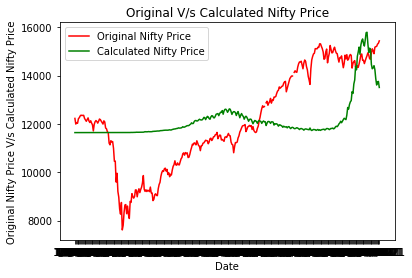

In [318]:
Ndate = final_data["date_n"]
Org_nifty = final_data["nifty_price"]
New_deaths = y_pred_new


# New Cases
plt.plot(Ndate, Org_nifty, color='r',label= "Original Nifty Price")
plt.plot(Ndate, New_deaths, color='g', label='Calculated Nifty Price')
  
# Naming the x-axis, y-axis and the whole graph
plt.ylabel("Original Nifty Price V/s Calculated Nifty Price")
plt.xlabel("Date")
plt.title("Original V/s Calculated Nifty Price")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()

